In [3]:
import pandas as pd
import numpy as np

input_path = 'dataset/cleaned_data_export.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((2736, 79), (2736,))

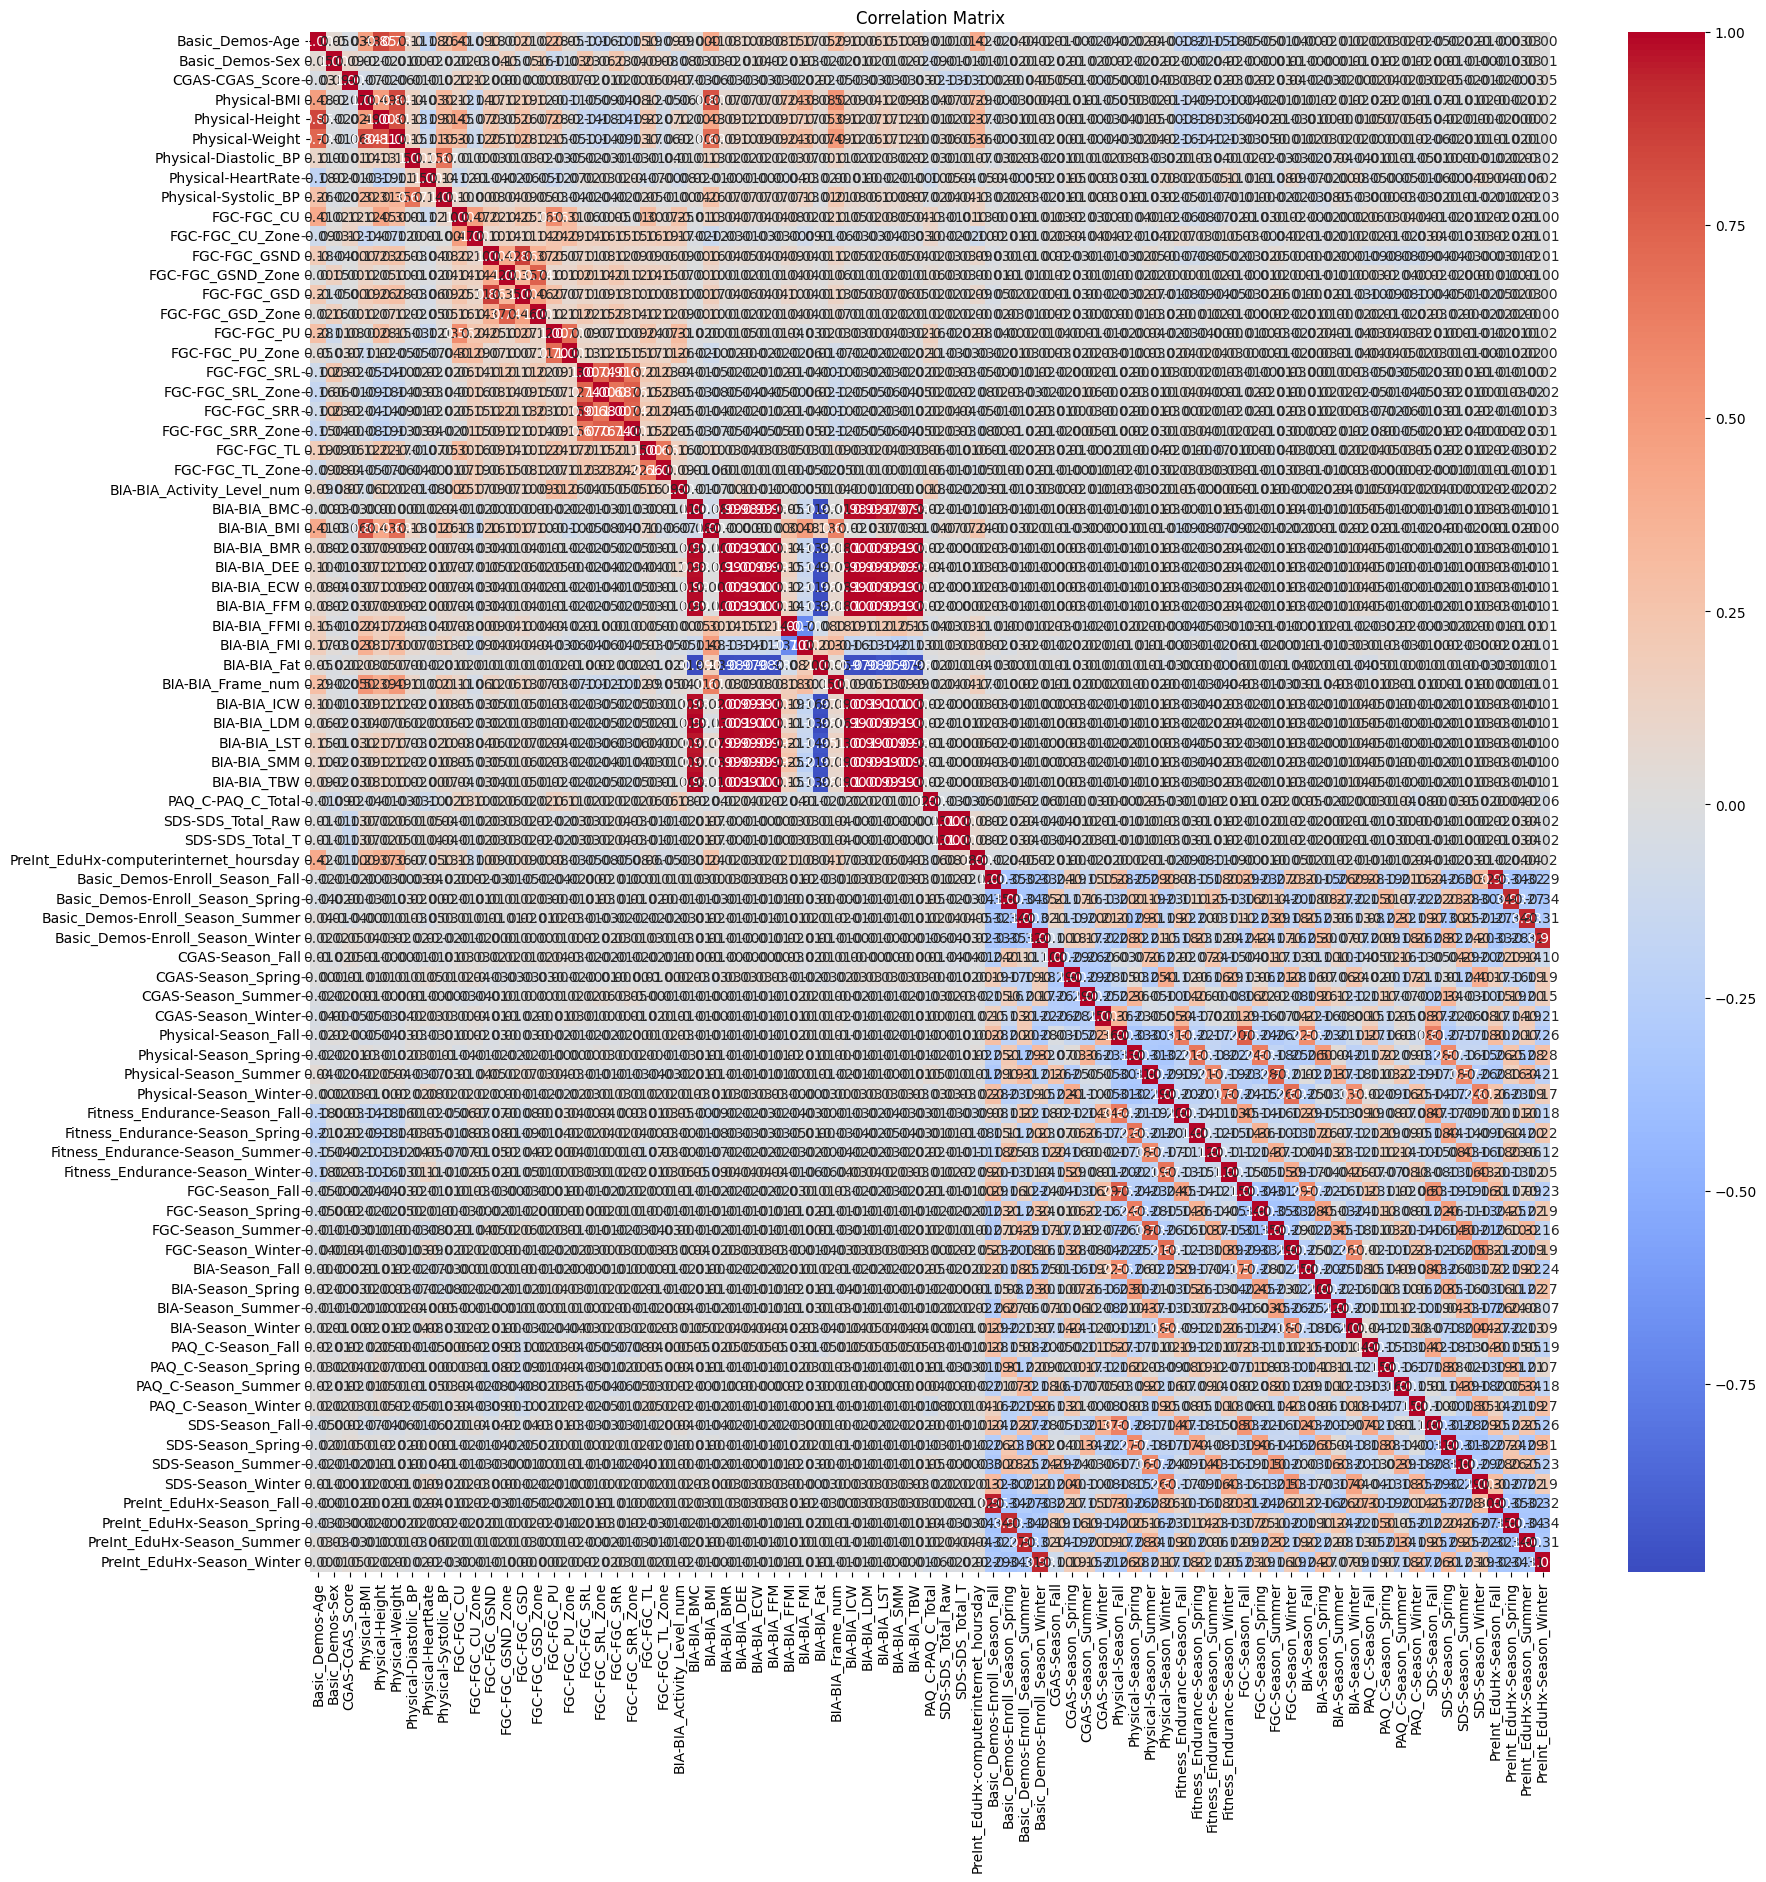

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix to find out the relationship between features. 
# With that, we can remove (or aggregate) the features that are highly correlated with each other.
corr_matrix = train.corr()

sii.shape

In [5]:
def intersect_features(train_set, test_set):
    smaller_train = train_set[train_set.columns.intersection(test_set.columns)]
    smaller_train = smaller_train.drop(columns=['id'], axis=1)
    return smaller_train

X_train = intersect_features(train, test)

X_train.shape

(2736, 58)

In [6]:
X_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0


In [7]:
# Drop the columns with more than a fixed percentage of missing values:
def drop_columns(df, threshold = 0.4):
    minimum_non_NaN = len(df) * threshold   
    dropped_columns = df.columns[df.isnull().sum() > (len(df) - minimum_non_NaN)].tolist()
    new_df = df.drop(columns=dropped_columns)
    return new_df, dropped_columns

features_train, dropped_columns = drop_columns(X_train)
features_train.info()
print("=====================================================\n shape: ", features_train.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2736 non-null   object 
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-Season                             2342 non-null   object 
 4   CGAS-CGAS_Score                         2342 non-null   float64
 5   Physical-Season                         2595 non-null   object 
 6   Physical-BMI                            2527 non-null   float64
 7   Physical-Height                         2530 non-null   float64
 8   Physical-Weight                         2572 non-null   float64
 9   Physical-Diastolic_BP                   2478 non-null   float64
 10  Physical-HeartRate                      2486 non-null   float64
 

In [8]:
features_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,75.0,...,39.4497,15.4107,27.0552,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,65.0,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,60.0,...,58.9338,26.4798,45.9966,Winter,2.451,Summer,31.0,45.0,Winter,0.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,60.0,...,79.6982,35.3804,63.1265,Spring,4.110,Summer,40.0,56.0,Spring,0.0
